# **Dataset**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing

from sklearn import svm
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from imblearn.under_sampling import RandomUnderSampler

In [ ]:
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# separating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]
print("Fraud ", fraud.shape)

Fraud  (492, 31)


In [ ]:
# Assume 'Class' column contains the labels (fraud or not fraud)
X = np.asarray(dataset.drop(columns='Class', axis = 1))
y = np.asarray(dataset['Class'])

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Apply SMOTE-Tomek for hybrid sampling
smt = SMOTETomek(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

# Count the number of instances
legit_instances = sum(y_resampled == 0)
fraud_instances = sum(y_resampled == 1)
total_instances = len(y_resampled)

print(f"Number of Legitimate Instances: {legit_instances}")
print(f"Number of Fraudulent Instances: {fraud_instances}")
print(f"Total Number of Instances: {total_instances}")

Number of Legitimate Instances: 226808
Number of Fraudulent Instances: 226808
Total Number of Instances: 453616


In [ ]:
classifiers = {
    "LR": LogisticRegression(),
    "RF": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate each classifier with SMOTE-Tomek sampling
for name, clf in classifiers.items():
    # Apply SMOTE-Tomek sampling
    smote_tomek = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

    # Train the classifier on the resampled data
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(X_test)

    # Check if the classifier supports probability estimation
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None

    accuracy = accuracy_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    fnr = fn / (fn + tp)
    fpr = fp / (fp + tn)

    print(f"\n{name} Classifier")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"Recall: {recall:.4f}")

    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        print("ROC AUC: Not available for this classifier.")

    print(f"FNR: {fnr:.4f}")
    print(f"FPR: {fpr:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LR Classifier
Accuracy: 0.9835
Precision: 0.0857
F1-Score: 0.1563
Recall: 0.8878
ROC AUC: 0.9771
FNR: 0.1122
FPR: 0.0163

RF Classifier
Accuracy: 0.9996
Precision: 0.9011
F1-Score: 0.8677
Recall: 0.8367
ROC AUC: 0.9791
FNR: 0.1633
FPR: 0.0002

XGBoost Classifier
Accuracy: 0.9994
Precision: 0.8283
F1-Score: 0.8325
Recall: 0.8367
ROC AUC: 0.9835
FNR: 0.1633
FPR: 0.0003


In [ ]:
classifiers = {"SVM": SVC(probability=True)}

# Subsample the dataset
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=0.1, stratify=y_train, random_state=42)

# Train and evaluate each classifier with SMOTE-Tomek oversampling on the subsampled dataset
for name, clf in classifiers.items():
    # Apply SMOTE-Tomek oversampling
    smote_tomek = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smote_tomek.fit_resample(X_train_sub, y_train_sub)

    # Train the classifier on the SMOTE-Tomek-resampled data
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(X_test)

    # Check if the classifier supports probability estimation
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None

    accuracy = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate additional metrics
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    fnr = fn / (fn + tp)  # False Negative Rate
    fpr = fp / (fp + tn)  # False Positive Rate

    print(f"\n{name} Classifier:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"Recall: {recall:.4f}")

    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        print("ROC AUC: Not available for this classifier.")

    print(f"FNR: {fnr:.4f}")
    print(f"FPR: {fpr:.4f}")


SVM Classifier:
Accuracy: 0.4851
Precision: 0.0013
F1-Score: 0.0027
Recall: 0.3980
ROC AUC: 0.4723
FNR: 0.6020
FPR: 0.5147


In [ ]:
classifiers = {
    "Ada Boost": AdaBoostClassifier(),
    "SGD": SGDClassifier(),
    "MLP": MLPClassifier()
}

# Train and evaluate each classifier with SMOTE-Tomek
for name, clf in classifiers.items():
    # Apply SMOTE-Tomek sampling
    smote_tomek = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

    # Train the classifier on the resampled data
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(X_test)

    # Check if the classifier supports probability estimation
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None

    accuracy = accuracy_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    fnr = fn / (fn + tp)
    fpr = fp / (fp + tn)

    print(f"\n{name} Classifier:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"Recall: {recall:.4f}")

    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        print("ROC AUC: Not available for this classifier.")

    print(f"FNR: {fnr:.4f}")
    print(f"FPR: {fpr:.4f}")


Ada Boost Classifier:
Accuracy: 0.9871
Precision: 0.1104
F1-Score: 0.1972
Recall: 0.9184
ROC AUC: 0.9822
FNR: 0.0816
FPR: 0.0127

SGD Classifier:
Accuracy: 0.9950
Precision: 0.1655
F1-Score: 0.2447
Recall: 0.4694
ROC AUC: Not available for this classifier.
FNR: 0.5306
FPR: 0.0041

MLP Classifier:
Accuracy: 0.9952
Precision: 0.2507
F1-Score: 0.3910
Recall: 0.8878
ROC AUC: 0.9825
FNR: 0.1122
FPR: 0.0046


In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
classifiers = {
    "DT": DecisionTreeClassifier(),
    "GNB": GaussianNB(),
    "GB": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each classifier with SMOTE-Tomek
for name, clf in classifiers.items():
    # Apply SMOTE-Tomek sampling
    smote_tomek = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

    # Train the classifier on the resampled data
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(X_test)

    # Check if the classifier supports probability estimation
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None

    accuracy = accuracy_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    fnr = fn / (fn + tp)
    fpr = fp / (fp + tn)

    print(f"\n{name} Classifier with SMOTETomek:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"Recall: {recall:.4f}")

    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        print("ROC AUC: Not available for this classifier.")

    print(f"FNR: {fnr:.4f}")
    print(f"FPR: {fpr:.4f}")


DT Classifier with SMOTETomek:
Accuracy: 0.9977
Precision: 0.4134
F1-Score: 0.5343
Recall: 0.7551
ROC AUC: 0.8766
FNR: 0.2449
FPR: 0.0018

GNB Classifier with SMOTETomek:
Accuracy: 0.9923
Precision: 0.1437
F1-Score: 0.2388
Recall: 0.7041
ROC AUC: 0.9600
FNR: 0.2959
FPR: 0.0072

GB Classifier with SMOTETomek:
Accuracy: 0.9939
Precision: 0.2052
F1-Score: 0.3333
Recall: 0.8878
ROC AUC: 0.9846
FNR: 0.1122
FPR: 0.0059

KNN Classifier with SMOTETomek:
Accuracy: 0.9496
Precision: 0.0191
F1-Score: 0.0369
Recall: 0.5612
ROC AUC: 0.7687
FNR: 0.4388
FPR: 0.0498


# **Soft Voting**

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

classifiers = {
    "VC1": VotingClassifier(estimators=[('RF', RandomForestClassifier()), ('XGB', XGBClassifier()), ('MLP', MLPClassifier())], voting='soft'),
    "VC2": VotingClassifier(estimators=[('RF', RandomForestClassifier()), ('XGB', XGBClassifier()), ('KNN', KNeighborsClassifier())], voting='soft'),
    "VC3": VotingClassifier(estimators=[('XGB', XGBClassifier()), ('MLP', MLPClassifier()), ('KNN', KNeighborsClassifier())], voting='soft')
}

# Train and evaluate each classifier with SMOTE-Tomek
for name, clf in classifiers.items():
    # Apply SMOTE-Tomek sampling
    smote_tomek = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

    # Train the classifier on the SMOTE-resampled data
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(X_test)

    # Check if the classifier supports probability estimation
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None

    accuracy = accuracy_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    fnr = fn / (fn + tp)
    fpr = fp / (fp + tn)

    print(f"\n{name} Classifier with SMOTETomek:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"Recall: {recall:.4f}")

    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        print("ROC AUC: Not available for this classifier.")

    print(f"FNR: {fnr:.4f}")
    print(f"FPR: {fpr:.4f}")



VC1 Classifier with SMOTETomek:
Accuracy: 0.9994
Precision: 0.8058
F1-Score: 0.8259
Recall: 0.8469
ROC AUC: 0.9848
FNR: 0.1531
FPR: 0.0004

VC2 Classifier with SMOTETomek:
Accuracy: 0.9996
Precision: 0.9022
F1-Score: 0.8737
Recall: 0.8469
ROC AUC: 0.9706
FNR: 0.1531
FPR: 0.0002

VC3 Classifier with SMOTETomek:
Accuracy: 0.9890
Precision: 0.1213
F1-Score: 0.2128
Recall: 0.8673
ROC AUC: 0.9738
FNR: 0.1327
FPR: 0.0108


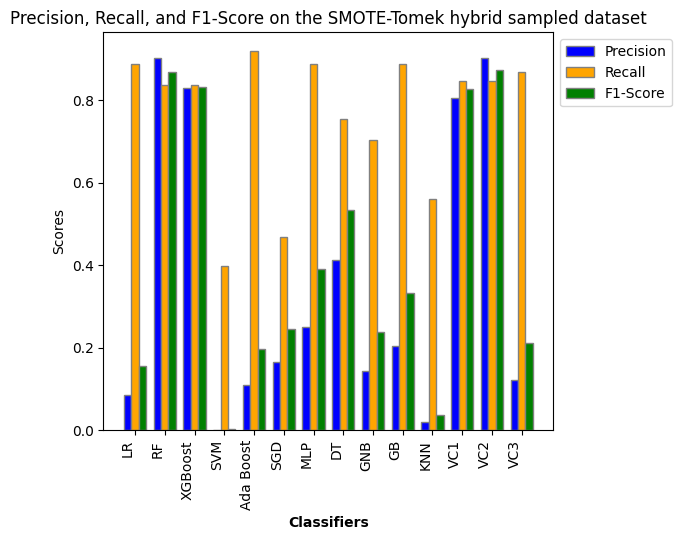

In [ ]:
classifiers = ["LR", "RF", "XGBoost", "SVM", "Ada Boost", "SGD", "MLP", "DT", "GNB", "GB", "KNN", "VC1", "VC2", "VC3"]

precision_values = [0.0857, 0.9011, 0.8283, 0.0013, 0.1104, 0.1655, 0.2507, 0.4134, 0.1437, 0.2052, 0.0191, 0.8058, 0.9022, 0.1213]
recall_values = [0.8878, 0.8367, 0.8367, 0.3980, 0.9184, 0.4694, 0.8878, 0.7551, 0.7041, 0.8878, 0.5612, 0.8469, 0.8469, 0.8673]
f1_score_values = [0.1563, 0.8677, 0.8325, 0.0027, 0.1972, 0.2447, 0.3910, 0.5343, 0.2388, 0.3333, 0.0369, 0.8259, 0.8737, 0.2128]

# Create a bar chart
bar_width = 0.25
index = np.arange(len(classifiers))

fig, ax = plt.subplots(figsize=(6.5, 5.5))

bar1 = ax.bar(index, precision_values, bar_width, label='Precision', edgecolor='grey', color='blue')
bar2 = ax.bar(index + bar_width, recall_values, bar_width, label='Recall', edgecolor='grey', color='orange')
bar3 = ax.bar(index + 2 * bar_width, f1_score_values, bar_width, label='F1-Score', edgecolor='grey', color='green')

ax.set_xlabel('Classifiers', fontweight='bold')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score on the SMOTE-Tomek hybrid sampled dataset')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classifiers, rotation=90, ha="right")
ax.legend(["Precision", "Recall", "F1-Score"], bbox_to_anchor=(1, 1), loc="upper left")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


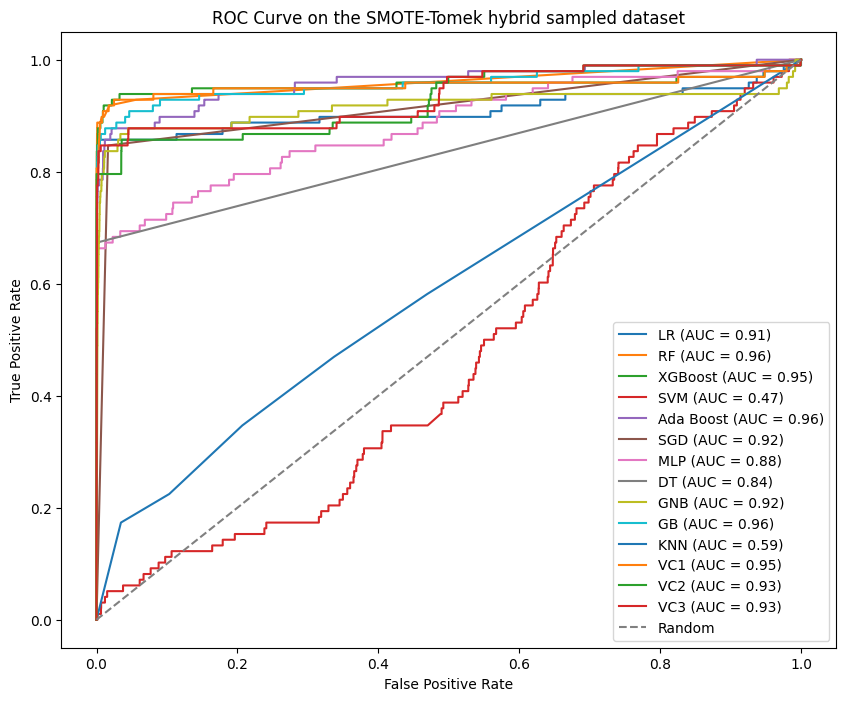

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

classifiers = {
    "LR": LogisticRegression(),
    "RF": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(probability=True),
    "Ada Boost": AdaBoostClassifier(),
    "SGD": SGDClassifier(loss='log'),
    "MLP": MLPClassifier(),
    "DT": DecisionTreeClassifier(),
    "GNB": GaussianNB(),
    "GB": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "VC1": VotingClassifier(estimators=[('RF', RandomForestClassifier()), ('XGB', XGBClassifier()), ('MLP', MLPClassifier())], voting='soft'),
    "VC2": VotingClassifier(estimators=[('RF', RandomForestClassifier()), ('XGB', XGBClassifier()), ('KNN', KNeighborsClassifier())], voting='soft'),
    "VC3": VotingClassifier(estimators=[('XGB', XGBClassifier()), ('MLP', MLPClassifier()), ('KNN', KNeighborsClassifier())], voting='soft')
}

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))

# Subsample the dataset
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=0.1, stratify=y_train, random_state=42)

# Train and evaluate each classifier with SMOTE-Tomek oversampling on the subsampled dataset
for name, clf in classifiers.items():
    # Apply SMOTE-Tomek oversampling
    smote_tomek = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smote_tomek.fit_resample(X_train_sub, y_train_sub)

    # Train the classifier on the SMOTE-Tomek-resampled data
    clf.fit(X_resampled, y_resampled)
    y_pred = clf.predict(X_test)

    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]
    elif hasattr(clf, "decision_function"):
        y_prob = clf.decision_function(X_test)
    else:
        raise ValueError(f"Classifier {name} does not support probability estimates or decision function.")

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on the SMOTE-Tomek hybrid sampled dataset')
plt.legend()
plt.show()

# **Friedman Test**

In [ ]:
from scipy.stats import friedmanchisquare
import numpy as np

xgboost_metrics = [0.9994, 0.8283, 0.8325, 0.8367, 0.9835, 0.1633, 0.0003]
vc1_metrics = [0.9994, 0.8058, 0.8259, 0.8469, 0.9848, 0.1531, 0.0004]
vc2_metrics = [0.9996, 0.9022, 0.8737, 0.8469, 0.9706, 0.1531, 0.0002]
vc3_metrics = [0.9890, 0.1213, 0.2128, 0.8673, 0.9738, 0.1327, 0.0108]

all_metrics = np.array([xgboost_metrics, vc1_metrics, vc2_metrics, vc3_metrics])

# Perform Friedman Test
statistic, p_value = friedmanchisquare(*all_metrics.T)

# Summarize and interpret the result
print(f"Friedman Test:")
print(f"Chi-squared Statistic: {statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value <= 0.05:
    print('The difference is statistically significant across at least one metric.')
else:
    print('No statistically significant difference across metrics.')

Friedman Test:
Chi-squared Statistic: 22.1786
P-Value: 0.0011
The difference is statistically significant across at least one metric.
